# Initially: MRL Eyes Dataset Preperation

In [1]:
import os
import shutil
import glob
from tqdm import tqdm
import random
import seaborn as sns


In [2]:
Raw_DIR= r"C:\Users\Nischit\VITc_Nischit_Progms\5-Nischit_Sem\DL_Proj_Nischits\Orignl_Data\mrlEyes_2018_01"
for dirpath, dirname, filenames in os.walk(Raw_DIR):
    for i in tqdm([f for f in filenames if f.endswith('.png')]):
        if i.split('_')[4]=='0':
            shutil.copy(src=dirpath+'/'+i, dst=r'C:\Users\Nischit\VITc_Nischit_Progms\5-Nischit_Sem\DL_Proj_Nischits\Our_Data\mrlEyes\CloseEyes')
        
        elif i.split('_')[4]=='1':
            shutil.copy(src=dirpath+'/'+i, dst=r'C:\Users\Nischit\VITc_Nischit_Progms\5-Nischit_Sem\DL_Proj_Nischits\Our_Data\mrlEyes\OpenEyes')

0it [00:00, ?it/s]
100%|██████████| 10257/10257 [00:17<00:00, 581.25it/s]


# Creating the Test and Train Dataset. 

In [7]:
def create_test_closed(source, destination, percent):
    '''
    divides closed eyes images into given percent and moves from
    source to destination.
    
    Arguments:
    source(path): path of source directory
    destination(path): path of destination directory
    percent(float): percent of data to be divided(range: 0 to 1)
    '''
    path, dirs, files_closed = next(os.walk(source))
    file_count_closed = len(files_closed)
    percentage = file_count_closed * percent
    to_move = random.sample(glob.glob(source + "/*.png"), int(percentage))

    for f in enumerate(to_move):
        if not os.path.exists(destination):
            os.makedirs(destination)
        shutil.move(f[1], destination)
    print(f'moved {int(percentage)} images to the destination successfully.') 

In [8]:
def create_test_open(source, destination, percent):
    '''
    divides open eyes images into given percent and moves from
    source to destination.
    
    Arguments:
    source(path): path of source directory
    destination(path): path of destination directory
    percent(float): percent of data to be divided(range: 0 to 1)
    '''
    path, dirs, files_open = next(os.walk(source))
    file_count_open = len(files_open)
    percentage = file_count_open * percent
    to_move = random.sample(glob.glob(source + "/*.png"), int(percentage))

    for f in enumerate(to_move):
        if not os.path.exists(destination):
            os.makedirs(destination)
        shutil.move(f[1], destination)
    print(f'moved {int(percentage)} images to the destination successfully.')

In [14]:

create_test_closed('C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Our_Data/mrlEyes/CloseEyes', 
                    'C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Our_Data/MRLtestNischit/CloseEyes', 
                    0.2)

moved 8389 images to the destination successfully.


In [15]:

create_test_open('C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Our_Data/mrlEyes/OpenEyes', 
                    'C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Our_Data/MRLtestNischit/OpenEyes', 
                    0.2)

moved 8590 images to the destination successfully.


# Before creating a CNN model, we'll analyse the Yawning dataset as well. 

In [18]:
import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [19]:
# Plotting the images in the directories
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

In [20]:
# To have a better image viualization, we'll darken the background. 
plt.style.use('dark_background')

In [ ]:
# Data Visualization.

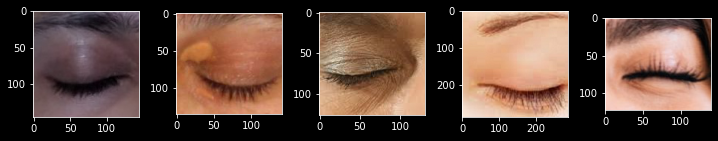

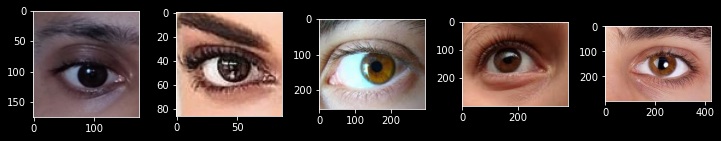

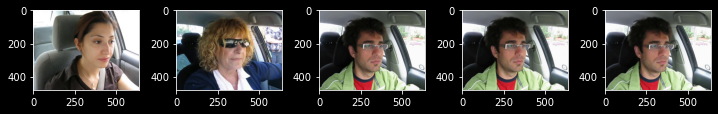

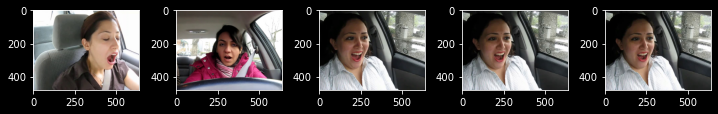

In [22]:
# calling the above function
data_path = 'Orignl_Data/yawn_eye_dataset/train'
directories = ['/Closed', '/Open', '/no_yawn', '/yawn']
for j in directories:
    plot_imgs(data_path+j)

In [63]:
batch_size = 40
img_height = 256
img_width = 256

In [65]:
import tensorflow as tf
from tensorflow.keras import layers
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Orignl_Data/yawn_eye_dataset/train',
    #validation_split=0.2,
    #subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Orignl_Data/yawn_eye_dataset/test',
    #validation_split=0.2,
    #subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2467 files belonging to 4 classes.
Found 433 files belonging to 4 classes.


In [66]:
class_names = training_ds.class_names
for images, labels in training_ds.take(1):
  for i in range(1):
    print(images)

tf.Tensor(
[[[[3.52910156e+01 2.32910156e+01 7.29101562e+00]
   [3.68730469e+01 2.48730469e+01 8.87304688e+00]
   [3.89101562e+01 2.64550781e+01 1.00000000e+01]
   ...
   [1.78544922e+02 1.41544922e+02 1.23544922e+02]
   [1.79000000e+02 1.42000000e+02 1.24000000e+02]
   [1.79648056e+02 1.42648056e+02 1.24648056e+02]]

  [[3.52910156e+01 2.32910156e+01 7.29101562e+00]
   [3.68730469e+01 2.50981293e+01 8.64796448e+00]
   [3.90274811e+01 2.67128906e+01 9.97683716e+00]
   ...
   [1.78404434e+02 1.41404434e+02 1.23404434e+02]
   [1.79000000e+02 1.42000000e+02 1.24000000e+02]
   [1.79000000e+02 1.42000000e+02 1.24000000e+02]]

  [[3.52910156e+01 2.32910156e+01 7.29101562e+00]
   [3.72481842e+01 2.61212311e+01 8.37513733e+00]
   [3.95993805e+01 2.76892242e+01 1.01443024e+01]
   ...
   [1.78000000e+02 1.41000000e+02 1.23000000e+02]
   [1.79000000e+02 1.42000000e+02 1.24000000e+02]
   [1.79000000e+02 1.42000000e+02 1.24000000e+02]]

  ...

  [[1.09429688e+02 7.34296875e+01 4.14296875e+01]
   [1

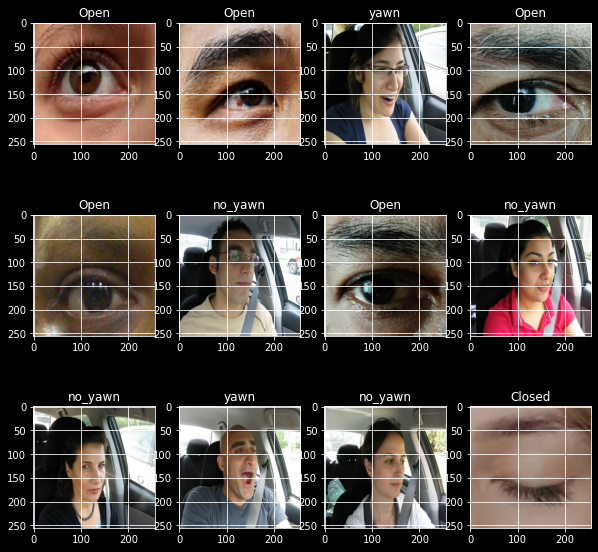

In [67]:

plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

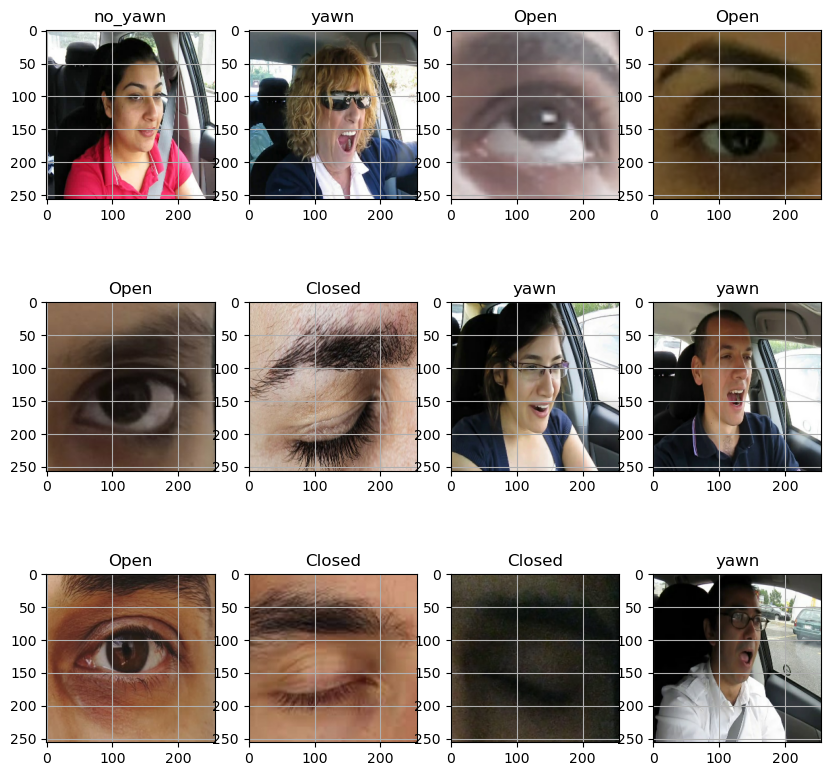

In [69]:
plt.style.use('default')
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

## Image Preprocessing 

In [31]:
# Image generator/Image preprocessing
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
#train_data_path = '/Orignl_Data/yawn_eye_dataset/train'
train_data_path=r"C:\Users\Nischit\VITc_Nischit_Progms\5-Nischit_Sem\DL_Proj_Nischits\Orignl_Data\yawn_eye_dataset\train"
#test_data_path = '/Orignl_Data/yawn_eye_dataset/test'
test_data_path=r"C:\Users\Nischit\VITc_Nischit_Progms\5-Nischit_Sem\DL_Proj_Nischits\Orignl_Data\yawn_eye_dataset\test"
print("Images in the train Dataset")
train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')
print("Images in the test Dataset")
test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Images in the train Dataset
Found 2467 images belonging to 4 classes.
Images in the test Dataset
Found 433 images belonging to 4 classes.


In [35]:
classes=4
# Since, we are cosidering, Open/Close Eyes and Yes/No Yawn

In [70]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [71]:
## lets define our CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),

  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [72]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
num_epochs = 20
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size


print("Train\n",training_steps)
print("Test\n",validation_steps)

Train
 19
Test
 3


In [43]:
print("Train images\n",train_set.n);print("batch_size\n",train_set.batch_size)

Train images
 2467
batch_size
 128


# First Basic Model Creation

In [73]:
## trying to train our initial CNN model
modle1 = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = num_epochs)

Epoch 1/20
62/62 [==============================] - 16s 195ms/step - loss: 1.0371 - accuracy: 0.4325 - val_loss: 0.7273 - val_accuracy: 0.5704
Epoch 2/20
62/62 [==============================] - 9s 143ms/step - loss: 0.7134 - accuracy: 0.5659 - val_loss: 0.6830 - val_accuracy: 0.6212
Epoch 3/20
62/62 [==============================] - 9s 153ms/step - loss: 0.6928 - accuracy: 0.5792 - val_loss: 0.6589 - val_accuracy: 0.5889
Epoch 4/20
62/62 [==============================] - 9s 150ms/step - loss: 0.6786 - accuracy: 0.5878 - val_loss: 0.6512 - val_accuracy: 0.6212
Epoch 5/20
62/62 [==============================] - 9s 151ms/step - loss: 0.6688 - accuracy: 0.6161 - val_loss: 0.6430 - val_accuracy: 0.6559
Epoch 6/20
62/62 [==============================] - 9s 151ms/step - loss: 0.6470 - accuracy: 0.6413 - val_loss: 0.6208 - val_accuracy: 0.6721
Epoch 7/20
62/62 [==============================] - 9s 152ms/step - loss: 0.6304 - accuracy: 0.6530 - val_loss: 0.6112 - val_accuracy: 0.6790
Epoch

### Accuracy Achieved= 74.36

In [101]:
a_cnn=0.7436

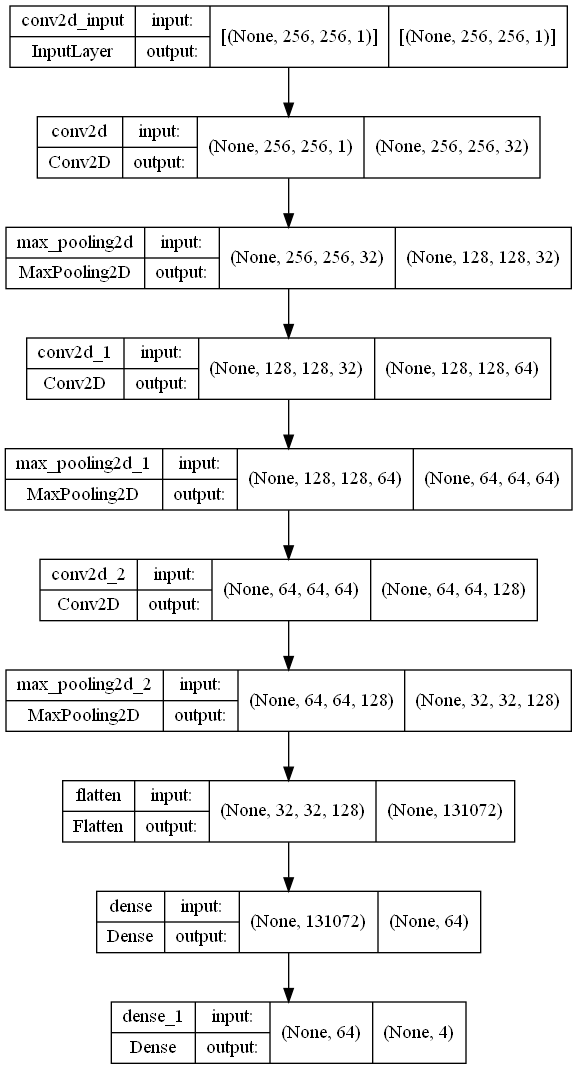

In [39]:
from tensorflow.keras.utils import plot_model
model1=model
plot_model(model, to_file='model_CNN.png', show_shapes=True, show_layer_names=True)

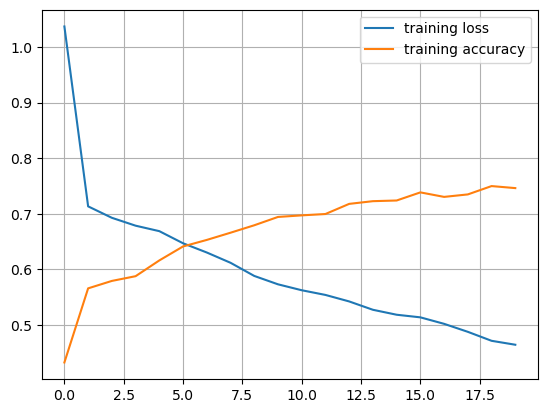

In [74]:
plt.plot(modle1.history['loss'], label = 'training loss')
plt.plot(modle1.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [75]:
# saving model
MyCnn.save('Nischit_drowsiness-mod1.h5')

# Observing the Model's Results

In [76]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)

# Increasing the Accuracy: 
Now, to increase the Accuracy, we'll use **VGG16 CNN** Model.

* VGG-16 is a convolutional neural network that is 16 layers deep. 
* We  can load a pretrained version of the network trained on more than a million images from the ImageNet database. * The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

In [78]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [79]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [80]:
train_path = 'C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Orignl_Data/yawn_eye_dataset/train'
valid_path = 'C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Orignl_Data/yawn_eye_dataset/test'

### Adding preprocessing layer to the front of VGG

In [81]:

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [86]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model2 = Model(inputs=vgg.input, outputs=prediction)

In [87]:
# view the structure of the model
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [88]:
# tell the model what cost and optimization method to use
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [89]:
# Preprocessin the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Orignl_Data/yawn_eye_dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Orignl_Data/yawn_eye_dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [90]:
num_epochs = 10
training_steps=training_set.n//training_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [91]:
print("Train\n",training_steps)
print("Test\n",validation_steps)

Train
 77
Test
 13


In [94]:
# fit the model
history2 = model2.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\SSD\AppData\Local\Temp\ipykernel_33904\1377155032.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(


Epoch 1/10
78/78 [==============================] - 58s 733ms/step - loss: 0.3804 - accuracy: 0.8298 - val_loss: 0.2784 - val_accuracy: 0.8730
Epoch 2/10
78/78 [==============================] - 51s 651ms/step - loss: 0.2323 - accuracy: 0.8995 - val_loss: 0.3255 - val_accuracy: 0.8776
Epoch 3/10
78/78 [==============================] - 52s 658ms/step - loss: 0.1825 - accuracy: 0.9193 - val_loss: 0.2056 - val_accuracy: 0.9076
Epoch 4/10
78/78 [==============================] - 55s 707ms/step - loss: 0.1529 - accuracy: 0.9428 - val_loss: 0.2098 - val_accuracy: 0.9053
Epoch 5/10
78/78 [==============================] - 53s 678ms/step - loss: 0.1258 - accuracy: 0.9485 - val_loss: 0.1300 - val_accuracy: 0.9469
Epoch 6/10
78/78 [==============================] - 55s 708ms/step - loss: 0.1076 - accuracy: 0.9607 - val_loss: 0.1495 - val_accuracy: 0.9353
Epoch 7/10
78/78 [==============================] - 50s 636ms/step - loss: 0.0821 - accuracy: 0.9745 - val_loss: 0.1088 - val_accuracy: 0.9630

In [100]:
a_vgg=0.9588

In [95]:
# loss
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

<Figure size 640x480 with 0 Axes>

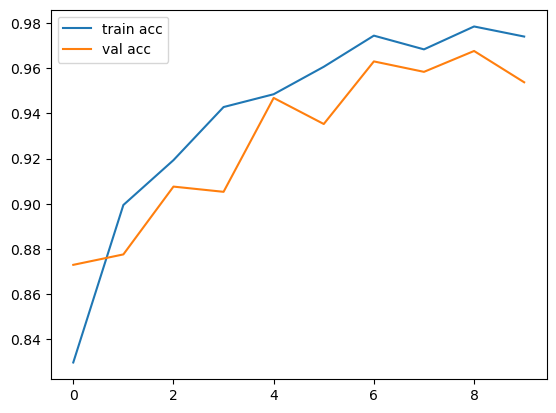

<Figure size 640x480 with 0 Axes>

In [96]:
# accuracies
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("VGG_")
plt.show()
plt.savefig('AccVal_acc')

In [99]:
# Saving the model
import tensorflow as tf

from keras.models import load_model

model2.save('Nischit_drowsiness-mod2_VGG.h5')

# Comparing the above VGG with our previous CNN model; 

# Now, Using our created MRL Dataset, Trying **ResNet** with only the Eye Configuration

In [128]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense

In [129]:
data_dir = 'C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Our_Data/mrlEyes'

In [130]:
train_datagen = ImageDataGenerator(validation_split=0.2,
                                   preprocessing_function=preprocess_input) # don't use rescale = 1./255

train_generator = train_datagen.flow_from_directory( data_dir,
                                                     target_size=(224,224),
                                                     batch_size=100,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2,
                                        preprocessing_function=preprocess_input)

validation_generator =  validation_datagen.flow_from_directory( data_dir,
                                                                target_size=(224,224),
                                                                batch_size=100,
                                                                class_mode='categorical',
                                                                subset='validation')   

Found 54336 images belonging to 2 classes.
Found 13583 images belonging to 2 classes.


# ResNet

In [138]:
model_res50 = Sequential()

model_res50.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet'
    ))

model_res50.add(Dense(2, activation='softmax'))

model_res50.layers[0].trainable = False 

model_res50.summary()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 4d473c1dd8becc155b73f8504c6f6626 so we will re-download the data.
94781440/94765736 [==============================] - 117s 1us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_8 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [150]:
from tensorflow.keras.utils import plot_model

plot_model(model_res50, to_file='model_resNet.png', show_shapes=True, show_layer_names=True)

In [139]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

In [140]:
Epoch=5
model_res50.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model_res50.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    validation_steps=steps_per_epoch_validation,
    epochs=Epoch,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/5
544/544 [==============================] - 514s 934ms/step - loss: 0.0939 - accuracy: 0.9655 - val_loss: 0.1272 - val_accuracy: 0.9542
Epoch 2/5
544/544 [==============================] - 458s 842ms/step - loss: 0.0605 - accuracy: 0.9792 - val_loss: 0.1361 - val_accuracy: 0.9541
Epoch 3/5
544/544 [==============================] - 513s 944ms/step - loss: 0.0534 - accuracy: 0.9815 - val_loss: 0.1763 - val_accuracy: 0.9471
Epoch 4/5
544/544 [==============================] - 431s 792ms/step - loss: 0.0489 - accuracy: 0.9828 - val_loss: 0.1718 - val_accuracy: 0.9496
Epoch 5/5
544/544 [==============================] - 425s 781ms/step - loss: 0.0462 - accuracy: 0.9837 - val_loss: 0.1713 - val_accuracy: 0.9482




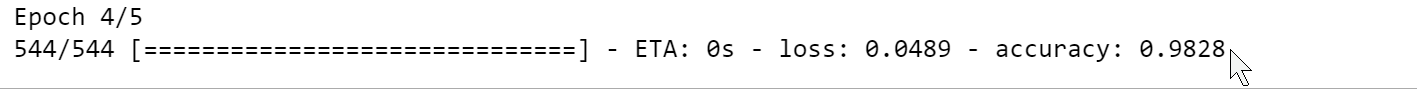

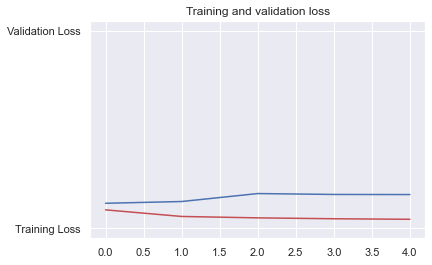

In [144]:
# Evaluating our Model
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')

plt.show()

In [142]:
model_res50.save('Nischit_drowsiness-mod3_ResNet50_Binary2_MRL.h5')

In [143]:
# CHecking if GPU is available or not. 
tf.test.is_gpu_available()

True

In [148]:
# Prediction 

img_array = cv2.imread(r"C:\Users\Nischit\VITc_Nischit_Progms\5-Nischit_Sem\DL_Proj_Nischits\Our_Data\MRLtestNischit\OpenEyes\s0001_01845_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (224, 224))
X_input = np.array(new_array).reshape(1, 224, 224, 3)
plt.imshow(new_array)
prediction = model_res50.predict(X_input/255.0)
prediction

array([[0.95299685, 0.04700317]], dtype=float32)

# Using InceptionV3
Inception v3 is an image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset. The model is the culmination of many ideas developed by multiple researchers over the years.

In [153]:
# HyperParameters
batchsize=8

In [151]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

In [155]:
train_data= train_datagen.flow_from_directory('C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Our_Data/mrlEyes',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory('C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Our_Data/mrlEyes',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 54336 images belonging to 2 classes.
Found 13583 images belonging to 2 classes.


In [156]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory('C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Our_Data/MRLtestNischit',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 16979 images belonging to 2 classes.


In [157]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model4 = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 124s 1us/step


In [160]:
model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 39, 39, 32)   864         ['input_8[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 39, 39, 32)  96          ['conv2d_10[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization_4[0][

                                                                                                  
 batch_normalization_14 (BatchN  (None, 7, 7, 96)    288         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_15 (BatchN  (None, 7, 7, 32)    96          ['conv2d_21[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_9[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_11[0][0]'] 
          

                                                                                                  
 conv2d_30 (Conv2D)             (None, 7, 7, 48)     13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_33 (Conv2D)             (None, 7, 7, 96)     55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_24 (BatchN  (None, 7, 7, 48)    144         ['conv2d_30[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_27 (BatchN  (None, 7, 7, 96)    288         ['conv2d_33[0][0]']              
 ormalization)                                                                                    
          

                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_12[0][0]']       
                                                                                                  
 conv2d_44 (Conv2D)             (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_38 (BatchN  (None, 3, 3, 128)   384         ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_38[0][0]'] 
                                                                                                  
 conv2d_45

 batch_normalization_48 (BatchN  (None, 3, 3, 160)   480         ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_48[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_49 (BatchN  (None, 3, 3, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 conv2d_65 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_59 (BatchN  (None, 3, 3, 160)   480         ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_59[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_55[0][0]']          
          

 activation_65 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_76 (Conv2D)             (None, 3, 3, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 3, 3, 192)   576         ['conv2d_71[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_70 (BatchN  (None, 3, 3, 192)   576         ['conv2d_76[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_74 (BatchN  (None, 3, 3, 192)   576         ['conv2d_80[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_78 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_78[0][0]'] 
          

 activation_78 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 batch_normalization_88 (BatchN  (None, 1, 1, 192)   576         ['conv2d_94[0][0]']              
 ormalization)                                                                                    
          

 activation_92 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_96[0][0]'] 
                                                                                                  
 batch_normalization_97 (BatchN  (None, 1, 1, 192)   576         ['conv2d_103[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_89[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatena

Downloading data



InceptionV3
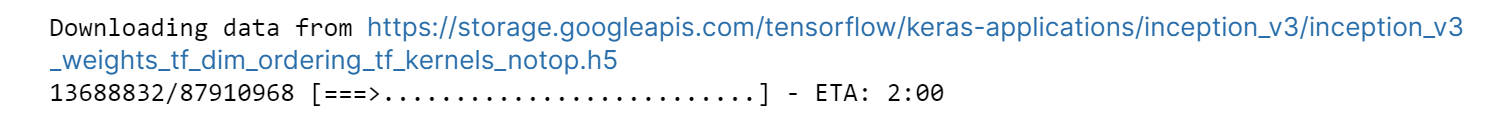

In [161]:
from tensorflow.keras.utils import plot_model
plot_model(model4, to_file='model4_InceptionV3.png', show_shapes=True, show_layer_names=True)

In [164]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau


In [162]:
checkpoint = ModelCheckpoint('C:/Users/Nischit/VITc_Nischit_Progms/5-Nischit_Sem/DL_Proj_Nischits/Nischit_drowsiness-mod4_Inception_MRL.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [165]:
model4.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=1)

6791/6792 [============================>.] - ETA: 0s - loss: 0.1579 - accuracy: 0.9401
Epoch 1: val_loss did not improve from 0.22499
6792/6792 [==============================] - 314s 46ms/step - loss: 0.1579 - accuracy: 0.9401 - val_loss: 0.2766 - val_accuracy: 0.9006 - lr: 0.0010


In [166]:
a_inc=0.9006

In [267]:
#Saved above, while training
#model4.save('Nischit_drowsiness-mod4_Inception_MRL.h5')

# Now, 
After analysint the data, we came to know that VGG16 and ResNet performed the best, so we'll use them for our Own Combined Dataset, which comprises of: 
* **MRL Eye Dataset** 
 - http://mrl.cs.vsb.cz/eyedataset
  - This is a the large-scale dataset of human eye images. This dataset contains infrared images in low and high resolution, all captured in various lightning conditions and by different devices. The dataset is suitable for testing several features or trainable classifiers. In order to simplify the comparison of algorithms, the images are divided into several categories, which also makes them suitable for training and testing classifiers.
* **Human Eye Images**
* **YawnNoYawn Detection**
* **NthuDDD  (3 GB, Specially Requested from Computer Vision Lab, National Tsing Hua University)**
 - http://cv.cs.nthu.edu.tw/php/callforpaper/datasets/DDD/
 - The NTHU-DDD video data set consists of 5 different sce-narios. The data set comprises of a group of male and femaledrivers from different ethnic groups. Each frame in the video is labeled with ‘‘fatigue’’ or ‘‘not fatigue’’. Videos consistof different types of ‘‘fatigue’’ and ‘‘not fatigue’’ activi-ties, including day and night. Videos are 640 ×480 pixels,30 frames per second in AVI format without audio
* **Yawn_Eye_Dataset**

In [170]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import random
import glob
from tqdm import tqdm
import random
import seaborn as sns

In [190]:
# !pip install split-folders
import splitfolders

In [198]:
input_folder='Orignl_Data/train_data_NTHUDDD2'

In [199]:
splitfolders.ratio(input_folder,
                    output='Our_Data/CombinedNischit/NTHU_Nischit', 
                    seed=47, 
                    ratio=(0.8, 0.2))

Copying files: 66521 files [02:38, 419.63 files/s]


In [203]:
labels = os.listdir("Our_Data/CombinedNischit/train")
labels

['Closed', 'no_yawn', 'Open', 'yawn']

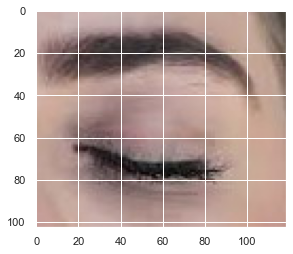

In [211]:
# Visualizing Ramdom images
import matplotlib.pyplot as plt
plt.imshow(plt.imread("Our_Data/CombinedNischit/train/Closed/_25.jpg"))

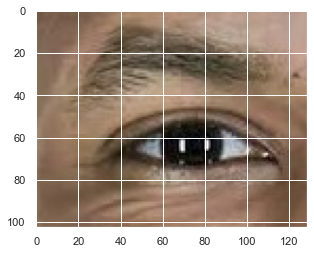

In [215]:
plt.imshow(plt.imread("Our_Data/CombinedNischit/train/Open/_25.jpg"))

In [216]:
plt.imshow(plt.imread("Our_Data/CombinedNischit/train/yawn/25.jpg"))

In [217]:
plt.imshow(plt.imread("Our_Data/CombinedNischit/train/no_yawn/25.jpg"))

# Observing the Pixels, Resolution

In [220]:
pix=plt.imread("Our_Data/CombinedNischit/train/no_yawn/25.jpg")
pix.shape

(480, 640, 3)

# Inference: 
After observing the Yawn, and NoYawn images, it can be observed that the background can be disturbing for training our data, so we'll try to only analyse the face

In [274]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
res=cv2.CascadeClassifier.empty(faceCascade)
print(not res)

# Veryfying the Haarcascade frontalface files.

True


In [275]:
def face_for_yawn(direc="Orignl_Data/yawn_eye_dataset/train", face_cas_path="Orignl_Data/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


# Doing the same, for the Open/Close eye dataset


In [276]:
def get_data(dir_path="Orignl_Data/yawn_eye_dataset/train/", 
             face_cas="Orignl_Data/haarcascade_frontalface_default.xml", 
             eye_cas="Orignl_Data/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [277]:
data_train = get_data()

2
3


In [278]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

### Seperating label and features 


In [280]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [281]:
# Reshaping the array
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [282]:
#LabelBinarizer: Accepting Categorical data as input and returns an Numpy array.
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [283]:
y = np.array(y)

In [284]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [285]:
len(X_test)

494

In [286]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [289]:
# Verifying tensorflow and keras version
tf.__version__

'2.8.0'

In [291]:
import keras
keras.__version__

'2.8.0'

# Data Augmentations


In [292]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [293]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 256)      0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0

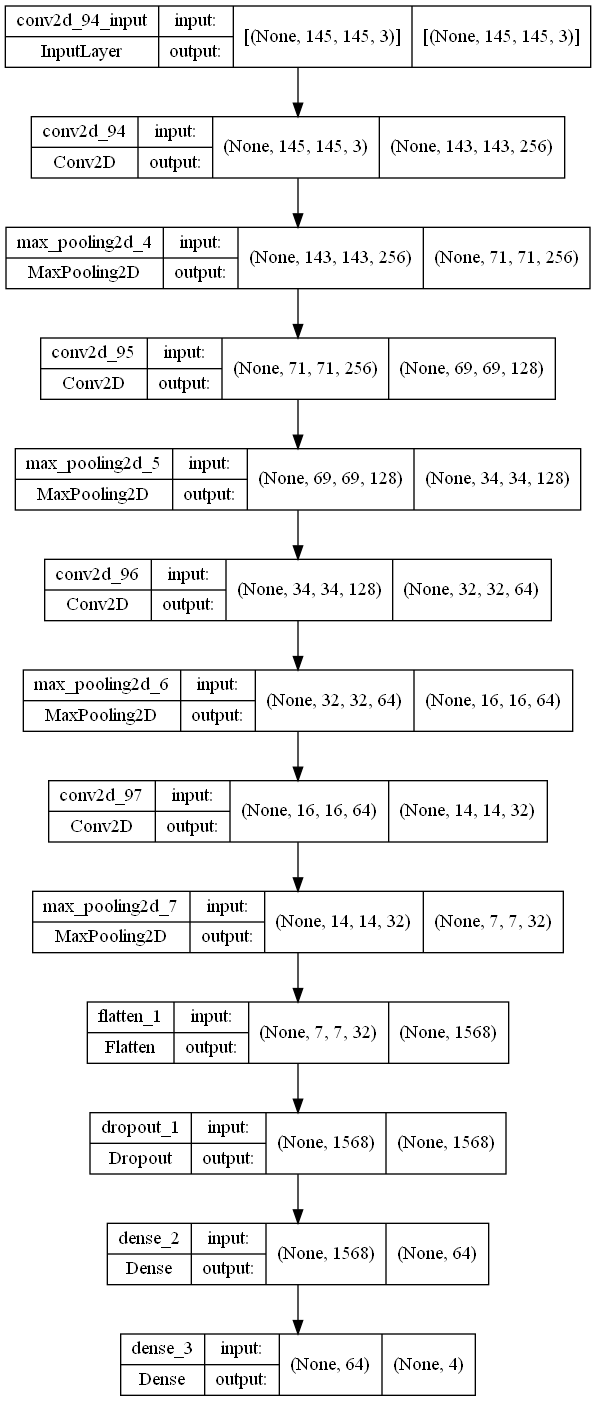

In [294]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model5_Combined.png', show_shapes=True, show_layer_names=True)

In [295]:
Epochs=50
history = model.fit(train_generator, 
                    epochs=Epochs, 
                    validation_data=test_generator, 
                    shuffle=True, 
                    validation_steps=len(test_generator))

Epoch 1/50
36/36 [==============================] - 34s 529ms/step - loss: 1.2040 - accuracy: 0.4470 - val_loss: 0.8243 - val_accuracy: 0.6498
Epoch 2/50
36/36 [==============================] - 10s 265ms/step - loss: 0.5240 - accuracy: 0.7965 - val_loss: 0.4798 - val_accuracy: 0.7834
Epoch 3/50
36/36 [==============================] - 8s 225ms/step - loss: 0.3977 - accuracy: 0.8348 - val_loss: 0.3362 - val_accuracy: 0.8563
Epoch 4/50
36/36 [==============================] - 8s 223ms/step - loss: 0.3241 - accuracy: 0.8609 - val_loss: 0.2867 - val_accuracy: 0.8866
Epoch 5/50
36/36 [==============================] - 8s 227ms/step - loss: 0.3031 - accuracy: 0.8713 - val_loss: 0.4056 - val_accuracy: 0.8563
Epoch 6/50
36/36 [==============================] - 8s 224ms/step - loss: 0.2840 - accuracy: 0.8783 - val_loss: 0.2432 - val_accuracy: 0.9028
Epoch 7/50
36/36 [==============================] - 8s 225ms/step - loss: 0.2685 - accuracy: 0.8843 - val_loss: 0.2536 - val_accuracy: 0.8968
Epoc

In [ ]:
# 100 Epoch

In [296]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Epochs=100
history = model.fit(train_generator, 
                    epochs=Epochs, 
                    validation_data=test_generator, 
                    shuffle=True, 
                    validation_steps=len(test_generator))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 71, 71, 256)      0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_100 (Conv2D)         (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)      

Epoch 99/100
36/36 [==============================] - 9s 241ms/step - loss: 0.0562 - accuracy: 0.9774 - val_loss: 0.0845 - val_accuracy: 0.9777
Epoch 100/100
36/36 [==============================] - 10s 273ms/step - loss: 0.0513 - accuracy: 0.9739 - val_loss: 0.0520 - val_accuracy: 0.9838


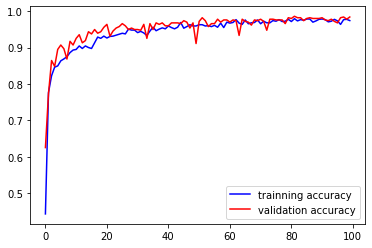

In [298]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [412]:
model.save("Nischit_drowsiness-mod5_Combined_All.h5")

# Predicting 

In [306]:
prediction = model.predict(X_test) 

In [310]:
classes_x=np.argmax(prediction,axis=1)
classes_x

array([2, 3, 3, 3, 2, 3, 2, 2, 3, 1, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 2, 3, 0, 3, 1, 2, 1, 2, 3, 3, 1, 0, 3, 1, 2, 2, 0,
       1, 3, 2, 2, 1, 1, 1, 3, 2, 3, 3, 2, 1, 2, 1, 2, 3, 0, 2, 0, 0, 0,
       3, 0, 2, 3, 3, 3, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 3, 1, 3, 3, 2,
       3, 0, 3, 3, 2, 1, 0, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3,
       1, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 2, 2, 2, 3, 3, 1, 3, 2,
       2, 2, 0, 2, 2, 2, 3, 3, 3, 0, 0, 2, 2, 2, 3, 3, 1, 3, 1, 0, 2, 1,
       0, 1, 3, 3, 0, 3, 0, 2, 3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 0, 1, 2,
       2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 0, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 3, 3, 2, 3, 2, 2, 3, 1, 3, 3, 2, 1, 3, 3, 0, 3,
       3, 3, 0, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 3, 0, 0, 2, 3, 1, 2, 2, 3,
       0, 3, 2, 3, 1, 0, 0, 3, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 2, 3, 3, 3, 2, 2, 3, 3, 1, 2, 0, 0, 0, 3, 0, 2, 0, 3, 2, 2, 2,
       1, 3, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3,

In [302]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [312]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), classes_x, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.88      0.87      0.88        53
     no_yawn       0.90      0.91      0.90        66
      Closed       0.99      0.90      0.94       181
        Open       0.91      0.99      0.95       194

    accuracy                           0.93       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.94      0.93      0.93       494



In [314]:
classes_x=classes_x.reshape(-1,1)

In [315]:
classes_x.shape

(494, 1)

In [317]:
type(classes_x)

numpy.ndarray

In [318]:
import numpy as np

n_values = np.max(classes_x) + 1
pred=np.eye(n_values)[classes_x]
pred

array([[[0., 0., 1., 0.]],

       [[0., 0., 0., 1.]],

       [[0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1.]],

       [[0., 0., 1., 0.]],

       [[0., 0., 0., 1.]]])

In [322]:
a=classification_report(np.argmax(y_test, axis=1), classes_x, target_names=labels_new)

In [326]:
from sklearn.metrics import confusion_matrix,accuracy_score

#Generate the confusion matrix
cf_matrix=confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))
print(cf_matrix)
#print(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))

[[ 46   7   0   0]
 [  6  60   0   0]
 [  0   0 162  19]
 [  0   0   1 193]]


[Text(0, 0.5, 'yawn'),
 Text(0, 1.5, 'no_yawn'),
 Text(0, 2.5, 'Closed'),
 Text(0, 3.5, 'Open')]

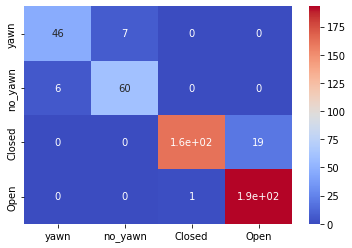

In [334]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')
ax.xaxis.set_ticklabels(['yawn','no_yawn','Closed','Open'])
ax.yaxis.set_ticklabels(['yawn','no_yawn','Closed','Open'])

[Text(0, 0.5, 'yawn'),
 Text(0, 1.5, 'no_yawn'),
 Text(0, 2.5, 'Closed'),
 Text(0, 3.5, 'Open')]

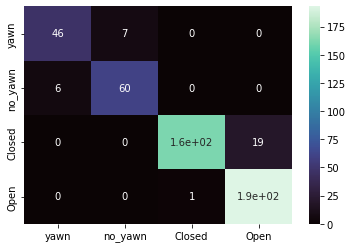

In [335]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='mako')
ax.xaxis.set_ticklabels(['yawn','no_yawn','Closed','Open'])
ax.yaxis.set_ticklabels(['yawn','no_yawn','Closed','Open'])

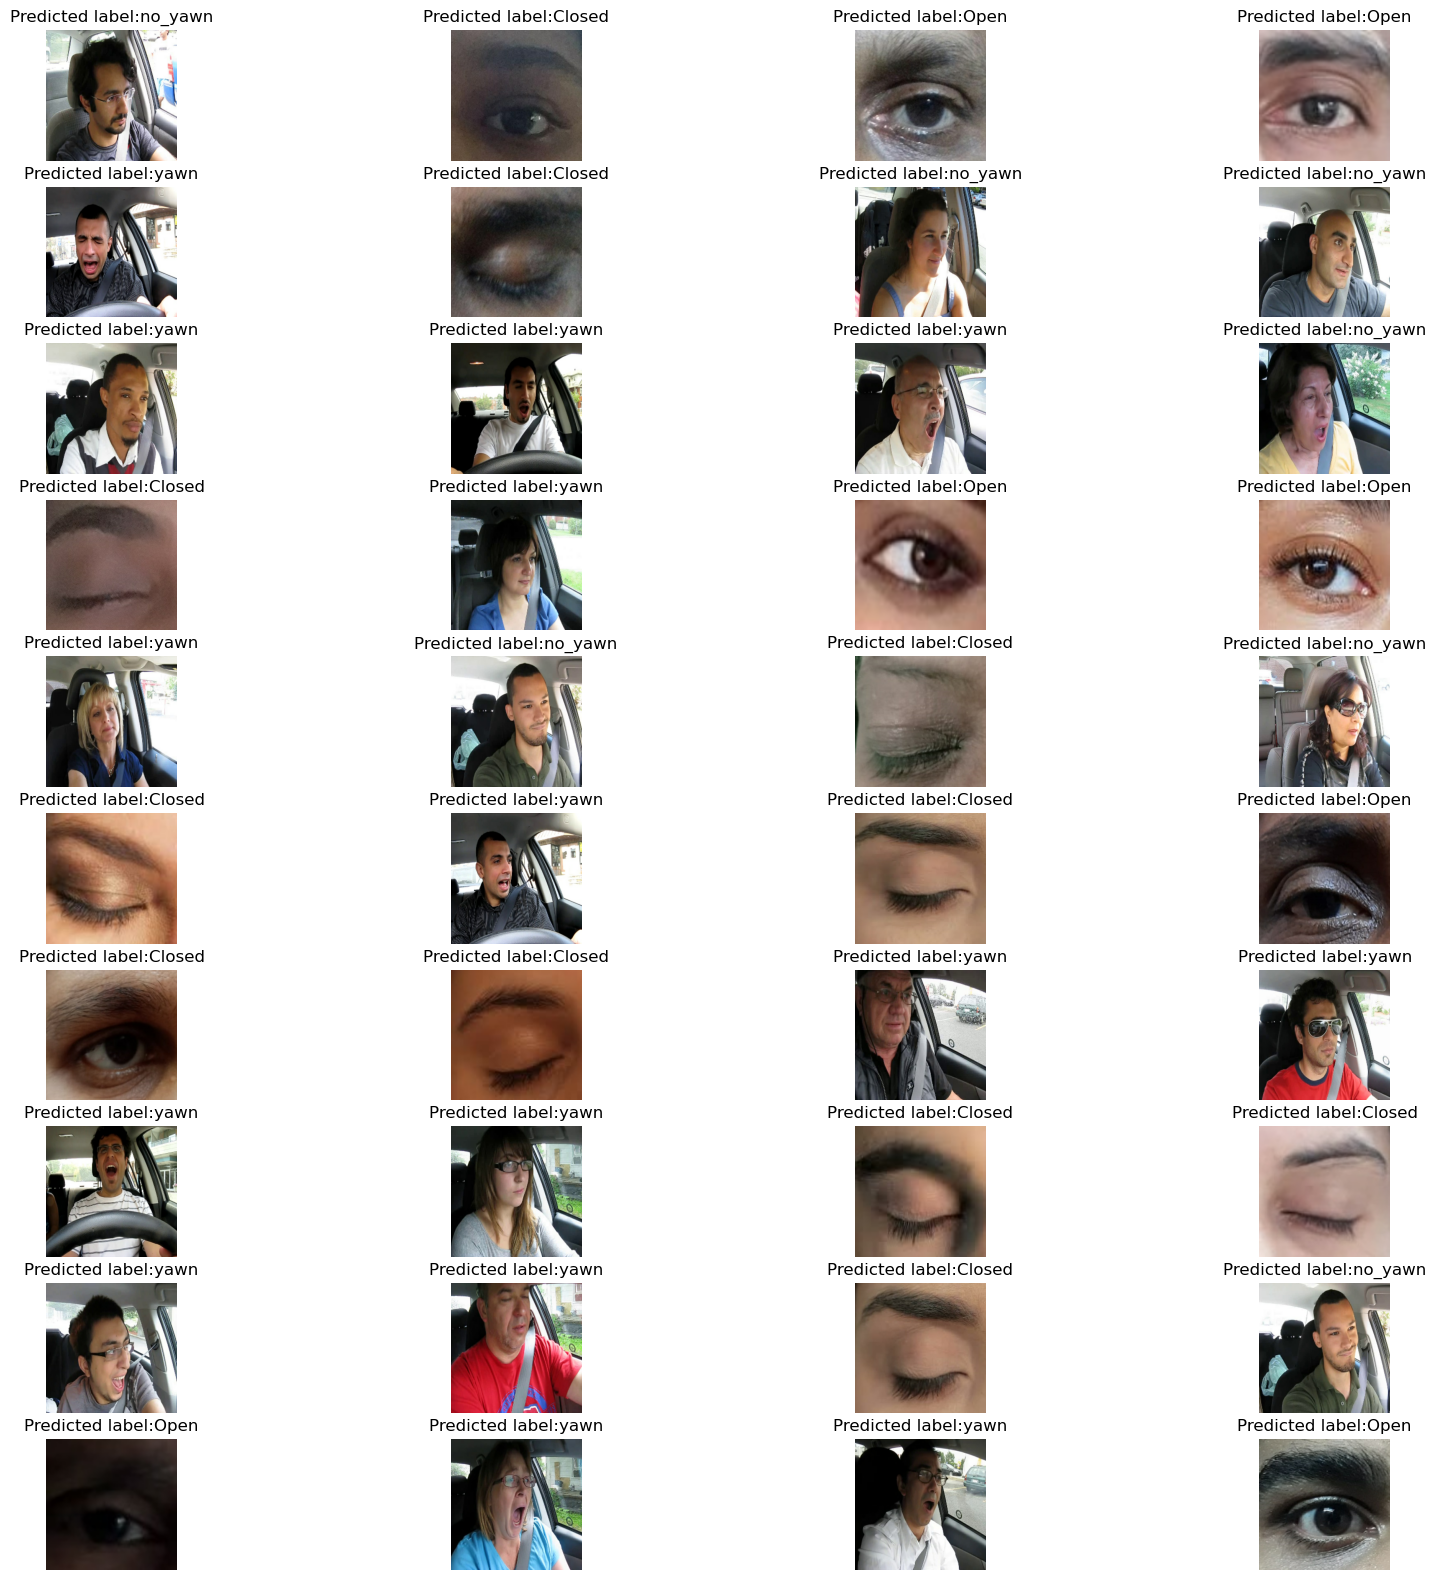

In [76]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)

In [367]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def PredictNischit(filepath, face_cas="haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model_Nischit = tf.keras.models.load_model("Nischit_drowiness-model5_Combined_All.h5")

In [356]:
pred4=model_Nischit.predict([prepare('Our_Data/CombinedNischit/train/Open/_44.jpg')])
np.argmax(pred4)

3

In [369]:
pred4=model_Nischit.predict([PredictNischit('Our_Data/CombinedNischit/train/Open/_44.jpg')])
np.argmax(pred4)

3

In [389]:
pred1=model_Nischit.predict([PredictNischitOP('Our_Data/CombinedNischit/train/Closed/_101.jpg')])
np.argmax(pred1)
# Closed, correct 2 

2

In [447]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def PredictNischitOP(filepath, face_cas="haarcascade_frontalface_default.xml"):
    plt.imshow(plt.imread(filepath))
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    ans= np.argmax(model_Nischit.predict([resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)]))
    #ans=np.argmax(resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) )
    plt.title('Predicted Op: '+labels_new[ans])

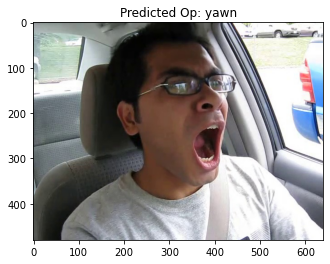

In [455]:
PredictNischitOP('Our_Data/CombinedNischit/test/yawn/249.jpg')

In [465]:
PredictNischitOP('Our_Data/CombinedNischit/train/no_yawn/2623.jpg')

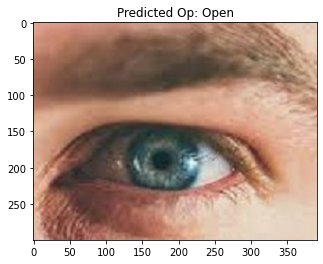

In [446]:
pred4=PredictNischitOP('Our_Data/CombinedNischit/test/Open/_441.jpg')

In [456]:
PredictNischitOP('Our_Data/CombinedNischit/test/yawn/61.jpg')

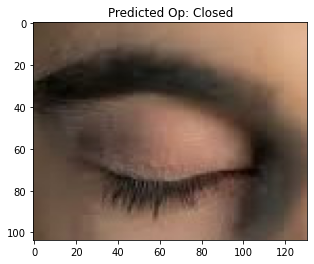

In [445]:
pred4=PredictNischitOP('Our_Data/CombinedNischit/test/Closed/_26.jpg')

# Implemting our Model for a Real Time Project

In [1]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time


mixer.init()
sound = mixer.Sound('alarm_Nischit.wav')

face = cv2.CascadeClassifier('haar cascade files\haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('haar cascade files\haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('haar cascade files\haarcascade_righteye_2splits.xml')

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
lbl=['Close','Open']
model = load_model('Nischit_drowsiness-mod5_Combined.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count = 0
score = 0
thicc = 2
rpred = [99]
lpred = [99]

In [3]:
while (True):
    ret, frame = cap.read()
    height, width = frame.shape[:2]

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face.detectMultiScale(gray, minNeighbors=5, scaleFactor=1.1, minSize=(25, 25))
    left_eye = leye.detectMultiScale(gray)
    right_eye = reye.detectMultiScale(gray)

    cv2.rectangle(frame, (0, height - 50), (200, height), (0, 0, 0), thickness=cv2.FILLED)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (100, 100, 100), 1)

    for (x, y, w, h) in right_eye:
        r_eye = frame[y:y + h, x:x + w]
        count = count + 1
        r_eye = cv2.cvtColor(r_eye, cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye, (24, 24))
        r_eye = r_eye / 255
        r_eye = r_eye.reshape(24, 24, -1)
        r_eye = np.expand_dims(r_eye, axis=0)
        rpred = np.argmax(model.predict(r_eye), axis=-1)
        if rpred[0].any() == 1:
            lbl = 'Open'
        if rpred[0].any() == 0:
            lbl = 'Closed'
        break

    for (x, y, w, h) in left_eye:
        l_eye = frame[y:y + h, x:x + w]
        count = count + 1
        l_eye = cv2.cvtColor(l_eye, cv2.COLOR_BGR2GRAY)
        l_eye = cv2.resize(l_eye, (24, 24))
        l_eye = l_eye / 255
        l_eye = l_eye.reshape(24, 24, -1)
        l_eye = np.expand_dims(l_eye, axis=0)
        lpred = np.argmax(model.predict(l_eye), axis=-1)
        if lpred[0].any() == 1:
            lbl = 'Open'
        if lpred[0].any() == 0:
            lbl = 'Closed'
        break

    if rpred[0].any() == 0 and lpred[0].any() == 0:
        score = score + 1
        cv2.putText(frame, "Closed", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
    # if(rpred[0]==1 or lpred[0]==1):
    else:
        score = score - 1
        cv2.putText(frame, "Open", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)

    if (score < 0):
        score = 0
    cv2.putText(frame, 'Score:' + str(score), (100, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
    if (score > 15):
        # person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join(path, 'image.jpg'), frame)
        try:
            sound.play()

        except:  # isplaying = False
            pass
        if (thicc < 16):
            thicc = thicc + 2
        else:
            thicc = thicc - 2
            if (thicc < 2):
                thicc = 2
        cv2.rectangle(frame, (0, 0), (width, height), (0, 0, 255), thicc)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Conclusion:
* We’ve successfully done a comparative study on which model and CNN architecture can be regarded as state of the art model, and the score varies in the real time. We’ve Tried multiple dataset, including the famous MRL, and NTHU-DDD dataset to name a few. 
* We were also able to increase the accuracy from the Initial Basic CNN architecture of just, 74%, to 90% of InceptionNet, and then 95% for ResNet, VGG-16, Finally after combining the dataset and 100 Epochs later, we were successfully able to get an accuracy of 98.38%. 
* The whole project is designed to decrease the rate of accidents and to contribute to the technology with the goal to prevent fatalities caused due to road accidents.
